In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [154]:
df = pd.read_csv('Car_Price_Details.csv')

In [155]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [157]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

# Convert the data type for the required columns

In [158]:
df['name'] = df['name'].astype('str')
df['Brand']=df.name.str.split(expand=True)[0]
df['Brand']

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: Brand, Length: 8128, dtype: object

In [159]:
# We have power data with us so we do not require torque data

df.drop(columns=['name','torque'],inplace=True)

In [160]:
df['mileage']=df['mileage'].astype('str')
df['mileage'] = df['mileage'].str.split(expand=True)[0]
df['mileage']

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8123     18.5
8124     16.8
8125     19.3
8126    23.57
8127    23.57
Name: mileage, Length: 8128, dtype: object

In [161]:
df['engine']=df['engine'].astype('str')
df['engine'] = df['engine'].str.split(expand=True)[0]
df['engine']

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine, Length: 8128, dtype: object

In [162]:
df['max_power']=df['max_power'].astype('str')
df['max_power'] = df['max_power'].str.split(expand=True)[0]
df['max_power']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8128, dtype: object

In [163]:
df['mileage'] = df['mileage'].astype('float64')
df['engine'] = df['engine'].astype('float64')
df=df.loc[~df['max_power'].isin(['bhp'])]
df['max_power'] = df['max_power'].astype('float64')

In [164]:
df.nunique()

year              29
selling_price    677
km_driven        921
fuel               4
seller_type        3
transmission       2
owner              5
mileage          381
engine           121
max_power        319
seats              9
Brand             32
dtype: int64

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8127 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8127 non-null   int64  
 1   selling_price  8127 non-null   int64  
 2   km_driven      8127 non-null   int64  
 3   fuel           8127 non-null   object 
 4   seller_type    8127 non-null   object 
 5   transmission   8127 non-null   object 
 6   owner          8127 non-null   object 
 7   mileage        7906 non-null   float64
 8   engine         7906 non-null   float64
 9   max_power      7912 non-null   float64
 10  seats          7906 non-null   float64
 11  Brand          8127 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 825.4+ KB


In [166]:
# Check for duplicates
df.duplicated().sum()

1221

In [167]:
# Drop duplicates
df.drop_duplicates(inplace = True)

df.duplicated().sum()

0

In [168]:
# Check for missing values
df.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
seats            208
Brand              0
dtype: int64

In [169]:
df['mileage'].fillna(value = df['mileage'].mean(), inplace = True)

df['engine'].fillna(value = df['engine'].mean(), inplace = True)

df['max_power'].fillna(value = df['max_power'].mean(), inplace = True)

df['seats'].fillna(value = df['seats'].mean(), inplace = True)

In [170]:
df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
Brand            0
dtype: int64

# EDA

In [171]:
df.groupby(['Brand']).year.count()

Brand
Ambassador          4
Ashok               1
Audi               33
BMW                47
Chevrolet         216
Daewoo              3
Datsun             57
Fiat               44
Force               4
Ford              360
Honda             362
Hyundai          1263
Isuzu               4
Jaguar              8
Jeep               22
Kia                 3
Land                3
Lexus               1
MG                  3
Mahindra          719
Maruti           2157
Mercedes-Benz      46
Mitsubishi         11
Nissan             73
Opel                1
Peugeot             1
Renault           205
Skoda              70
Tata              646
Toyota            356
Volkswagen        174
Volvo               9
Name: year, dtype: int64

In [172]:
order = pd.DataFrame(df.groupby('Brand')['year'].count()).sort_values(ascending = False, by = 'year')

order

,year
Brand,
Maruti,2157
Hyundai,1263
Mahindra,719
Tata,646
Honda,362
Ford,360
Toyota,356
Chevrolet,216
Renault,205


<AxesSubplot:xlabel='selling_price'>

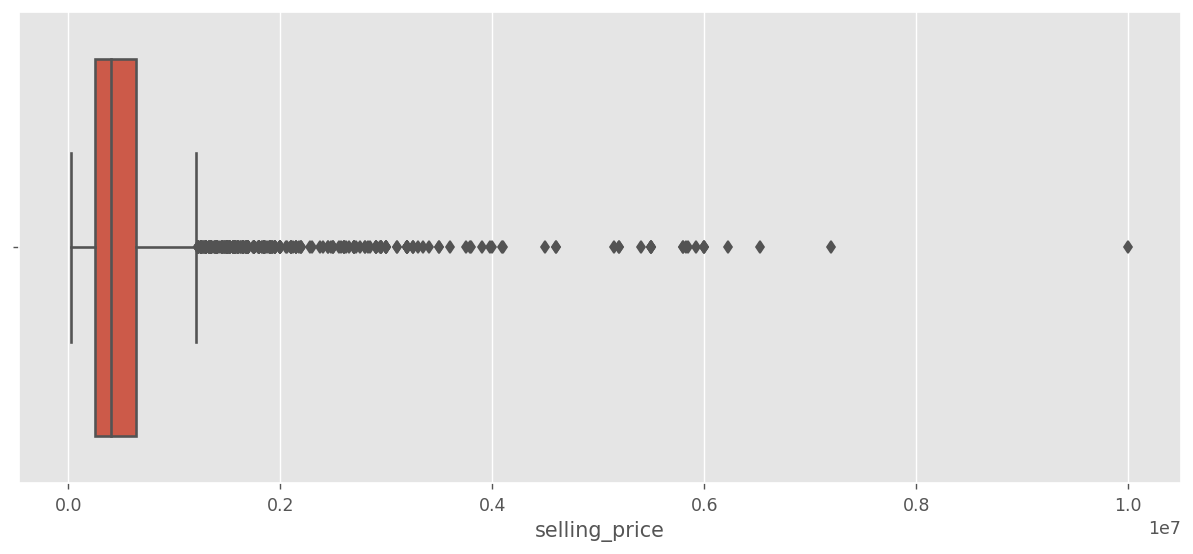

In [173]:
plt.figure(figsize = (12,5), dpi = 125)

sns.boxplot(df['selling_price'])

In [174]:
x = (np.where(df['selling_price']>6000000))

In [175]:
# Remove rows as index base
for i in range(0, len(x)):
    df = df.drop(df.index[x[i]])

<AxesSubplot:xlabel='selling_price'>

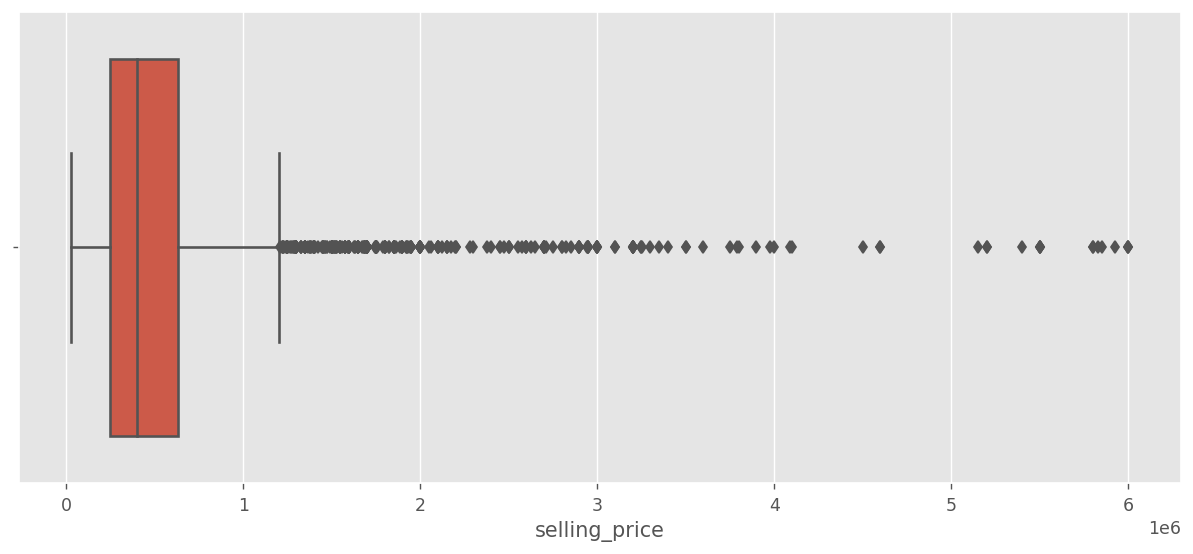

In [176]:
plt.figure(figsize = (12,5), dpi = 125)

sns.boxplot(df['selling_price'])

<AxesSubplot:xlabel='Brand', ylabel='count'>

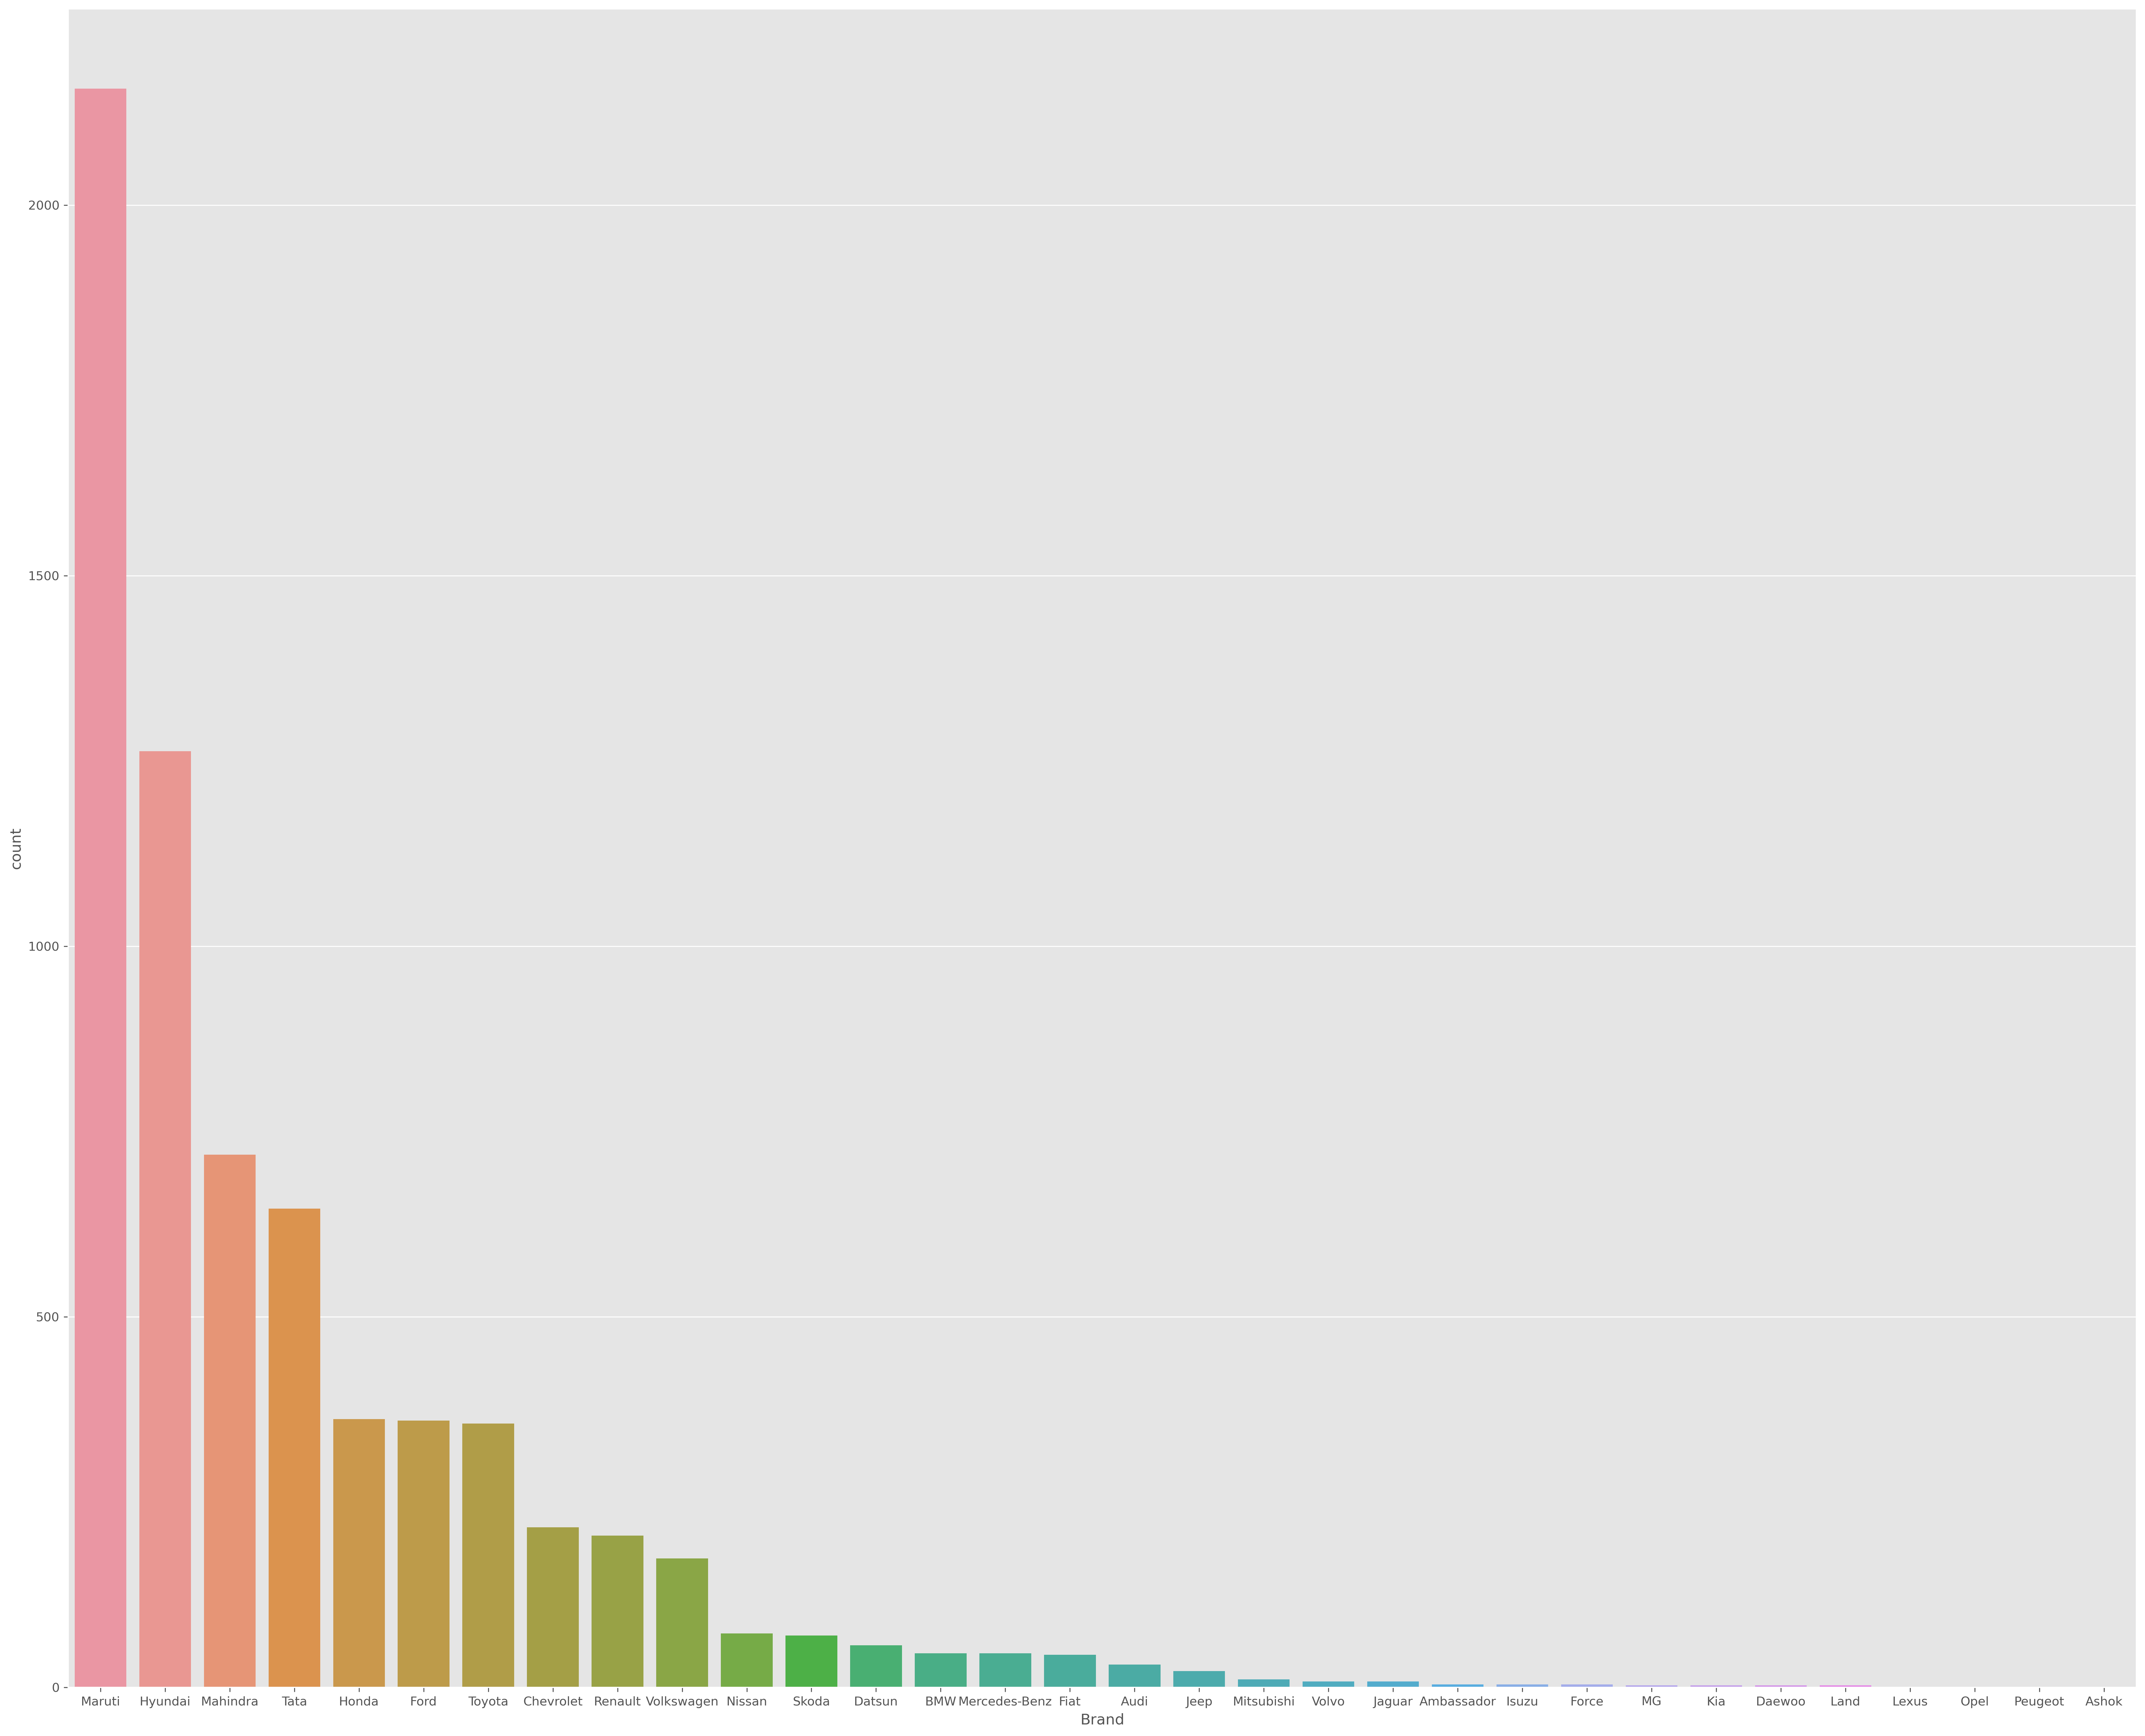

In [177]:
index = order.index

plt.figure(figsize = (30,25), dpi = 300)

sns.countplot(data = df, x = 'Brand', order = index)

<AxesSubplot:xlabel='Brand', ylabel='selling_price'>

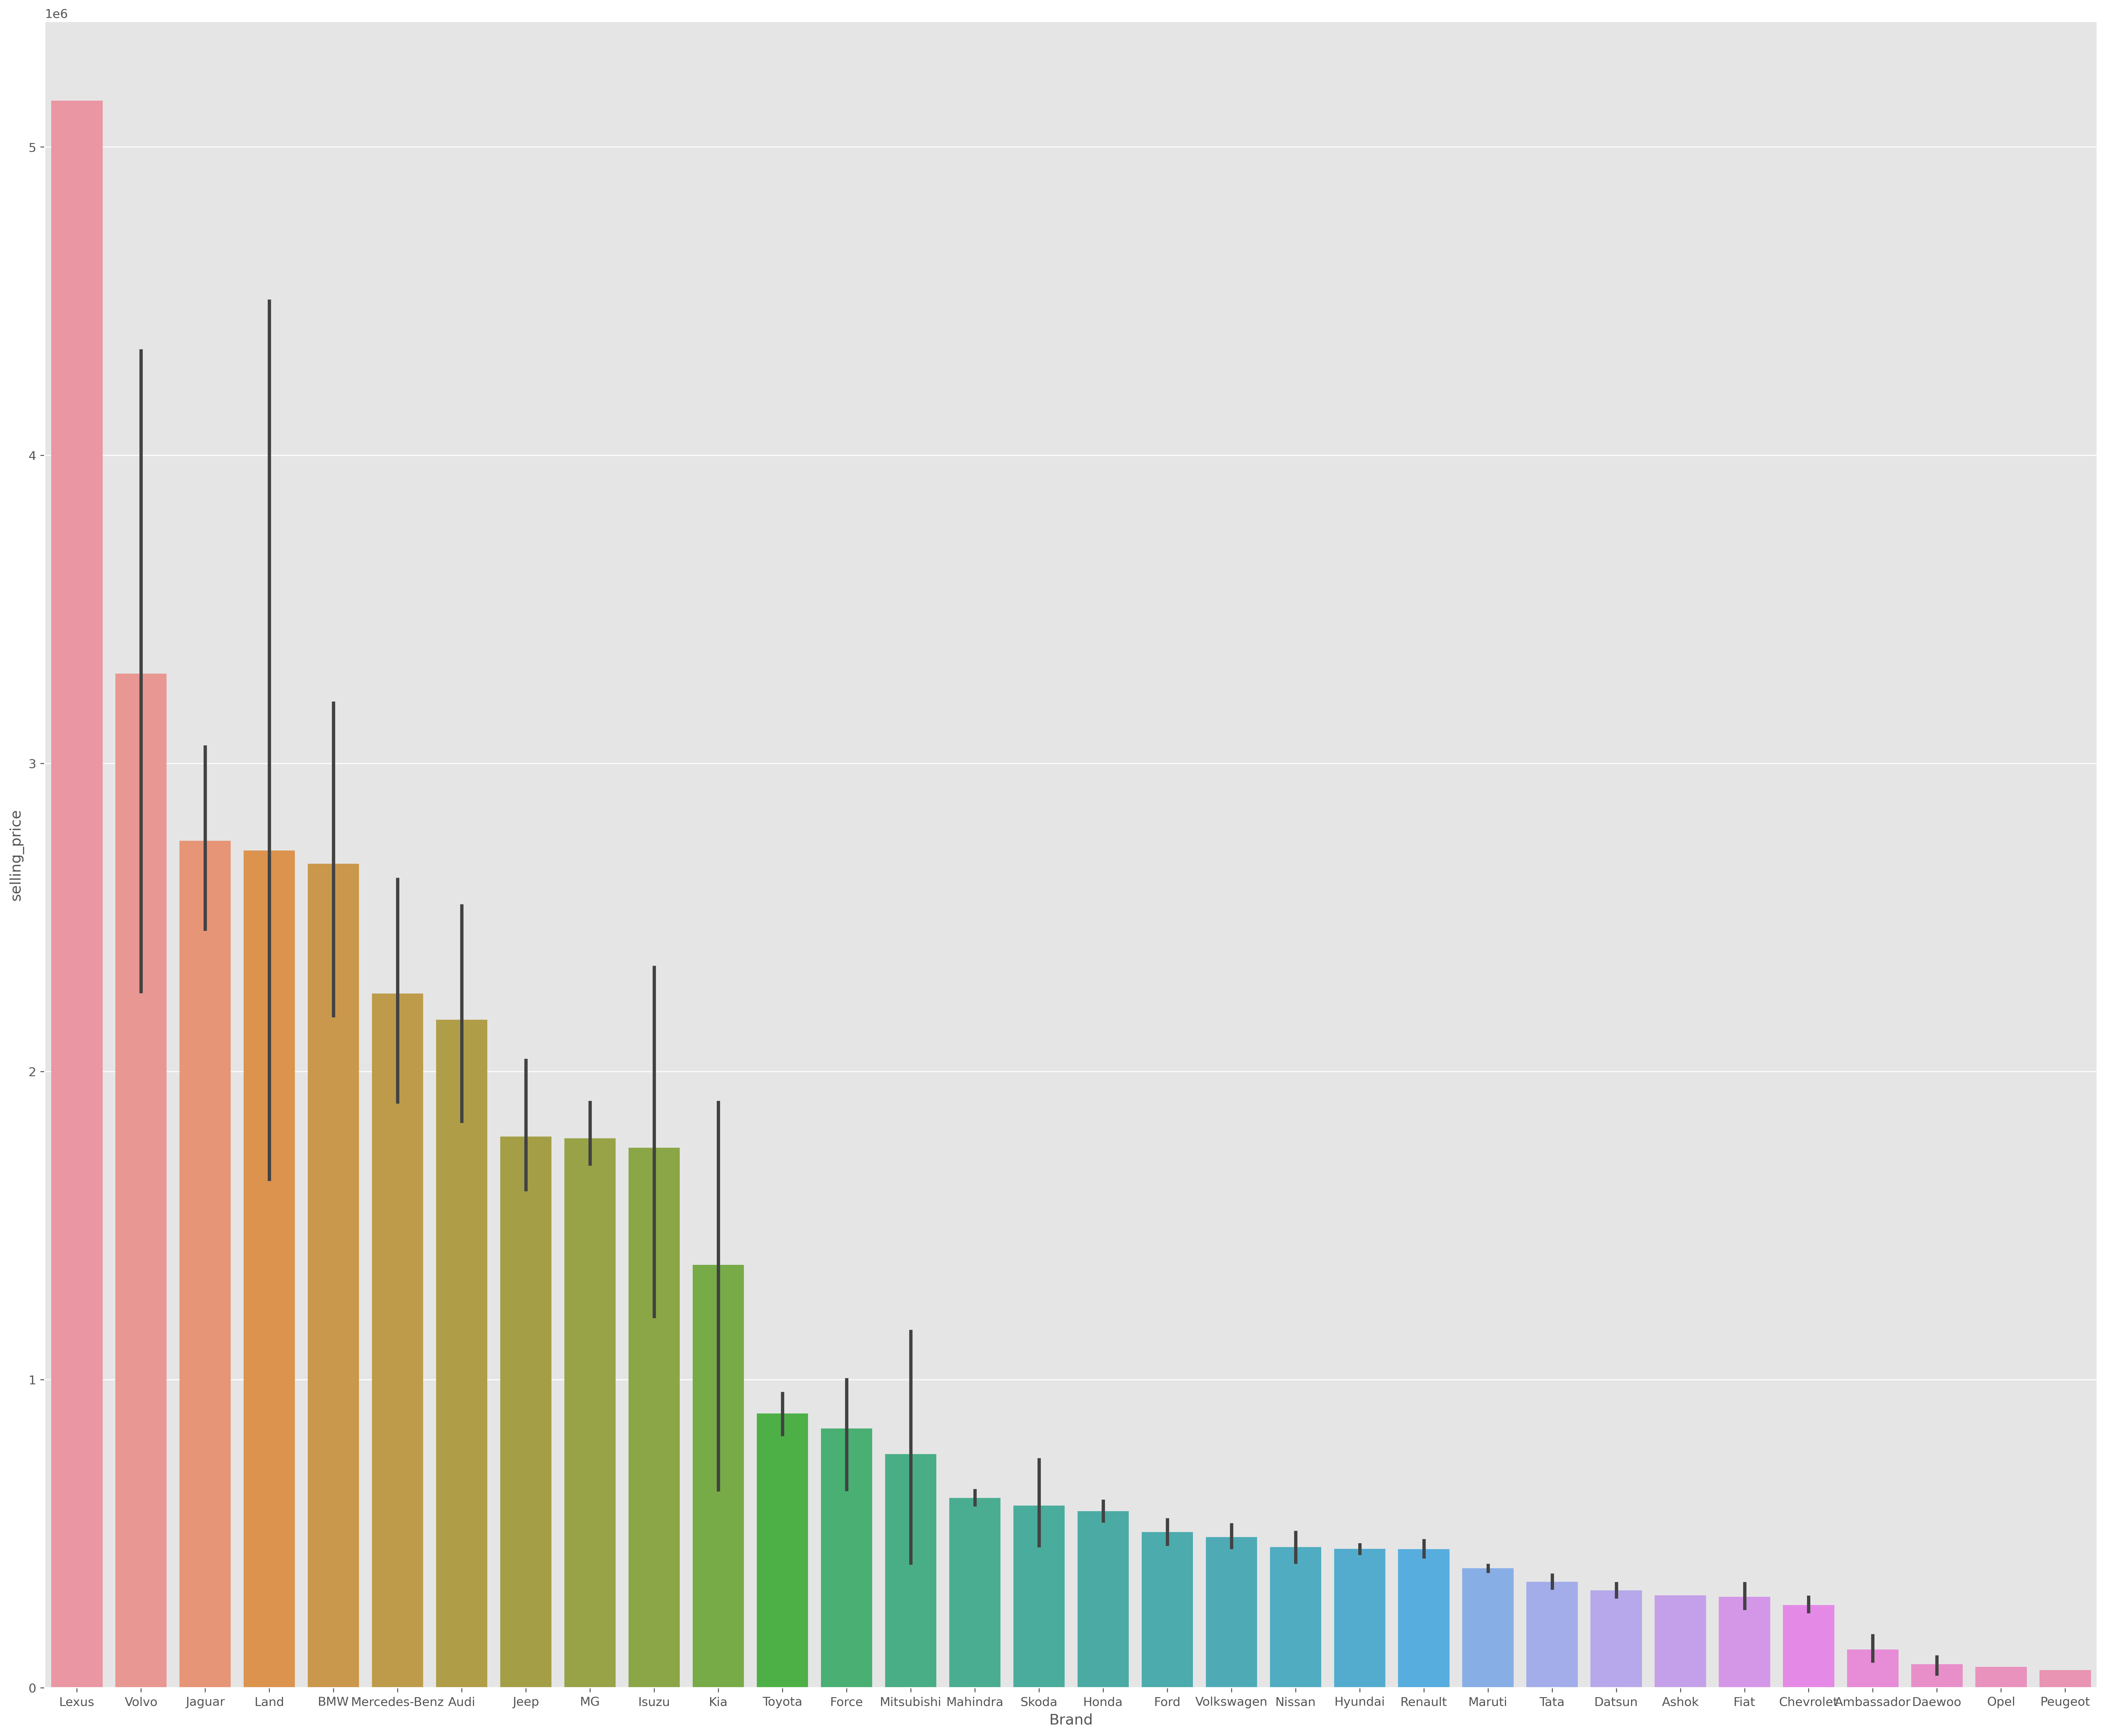

In [178]:
order = pd.DataFrame(df.groupby('Brand')['selling_price'].mean()).sort_values(ascending = False, by = 'selling_price')

index = order.index

plt.figure(figsize = (30,25), dpi = 300)

sns.barplot('Brand', 'selling_price', data = df, order = index)

# Conclusion: We can see Brands vs Selling Price comaprison but still, selling price depends 
#             on other factors also which we will consider.

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

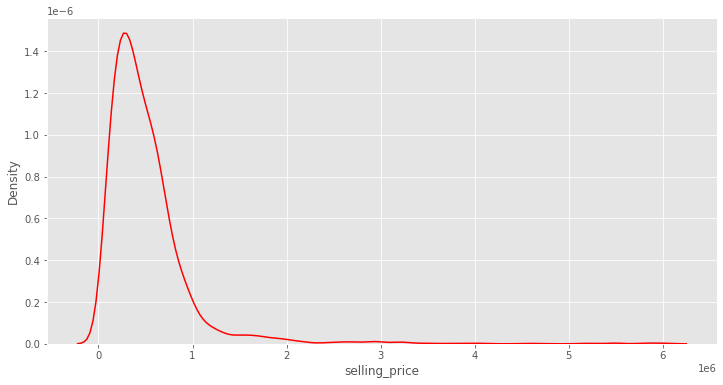

In [179]:
plt.figure(figsize = (12,6))

sns.distplot(df['selling_price'], hist = False, color = 'red')

In [180]:
df['selling_price'].max()

6000000

In [181]:
df['selling_price'].min()

29999

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

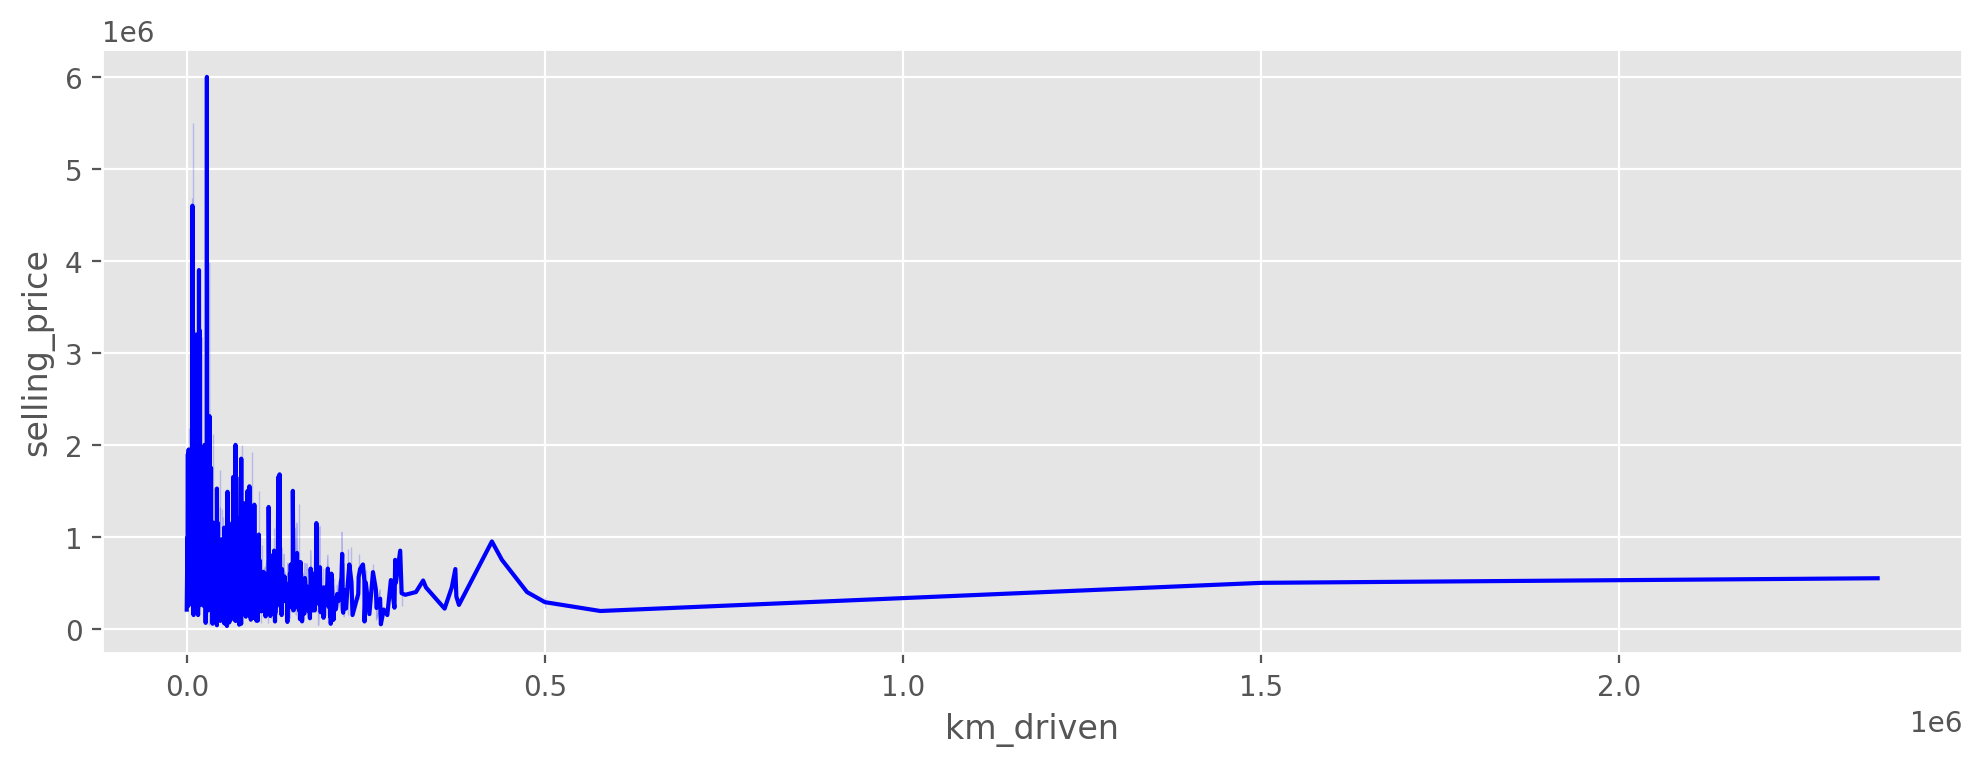

In [182]:
# selling price vs km driven

plt.figure(figsize = (12,4), dpi = 200)

sns.lineplot('km_driven','selling_price', data = df, color = 'blue')

# Conclusion: As the Km driven increases, selling price decreases.

In [183]:
df['mileage'].min()

0.0

In [184]:
df['mileage'].max()

33.44

([<matplotlib.axis.XTick at 0x21718932c10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

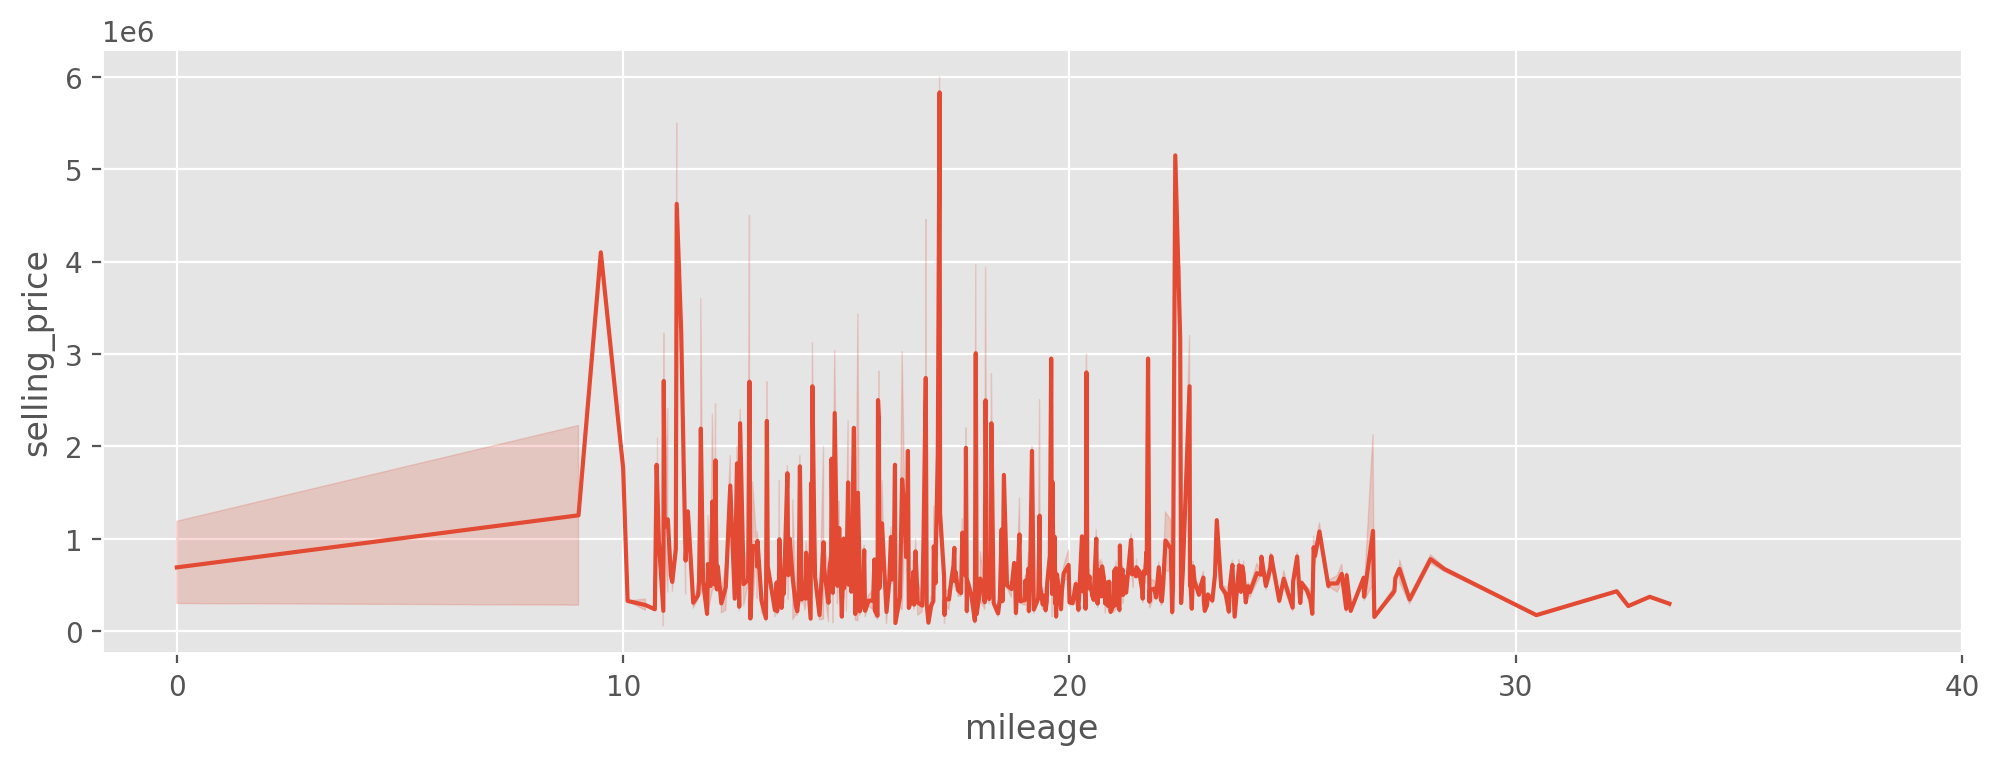

In [185]:
# selling price vs mileage

plt.figure(figsize = (12,4), dpi = 200)

sns.lineplot('mileage','selling_price', data = df)

plt.xticks(range(0,45,10))

# Conclusion: Not sure about conclusion.

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

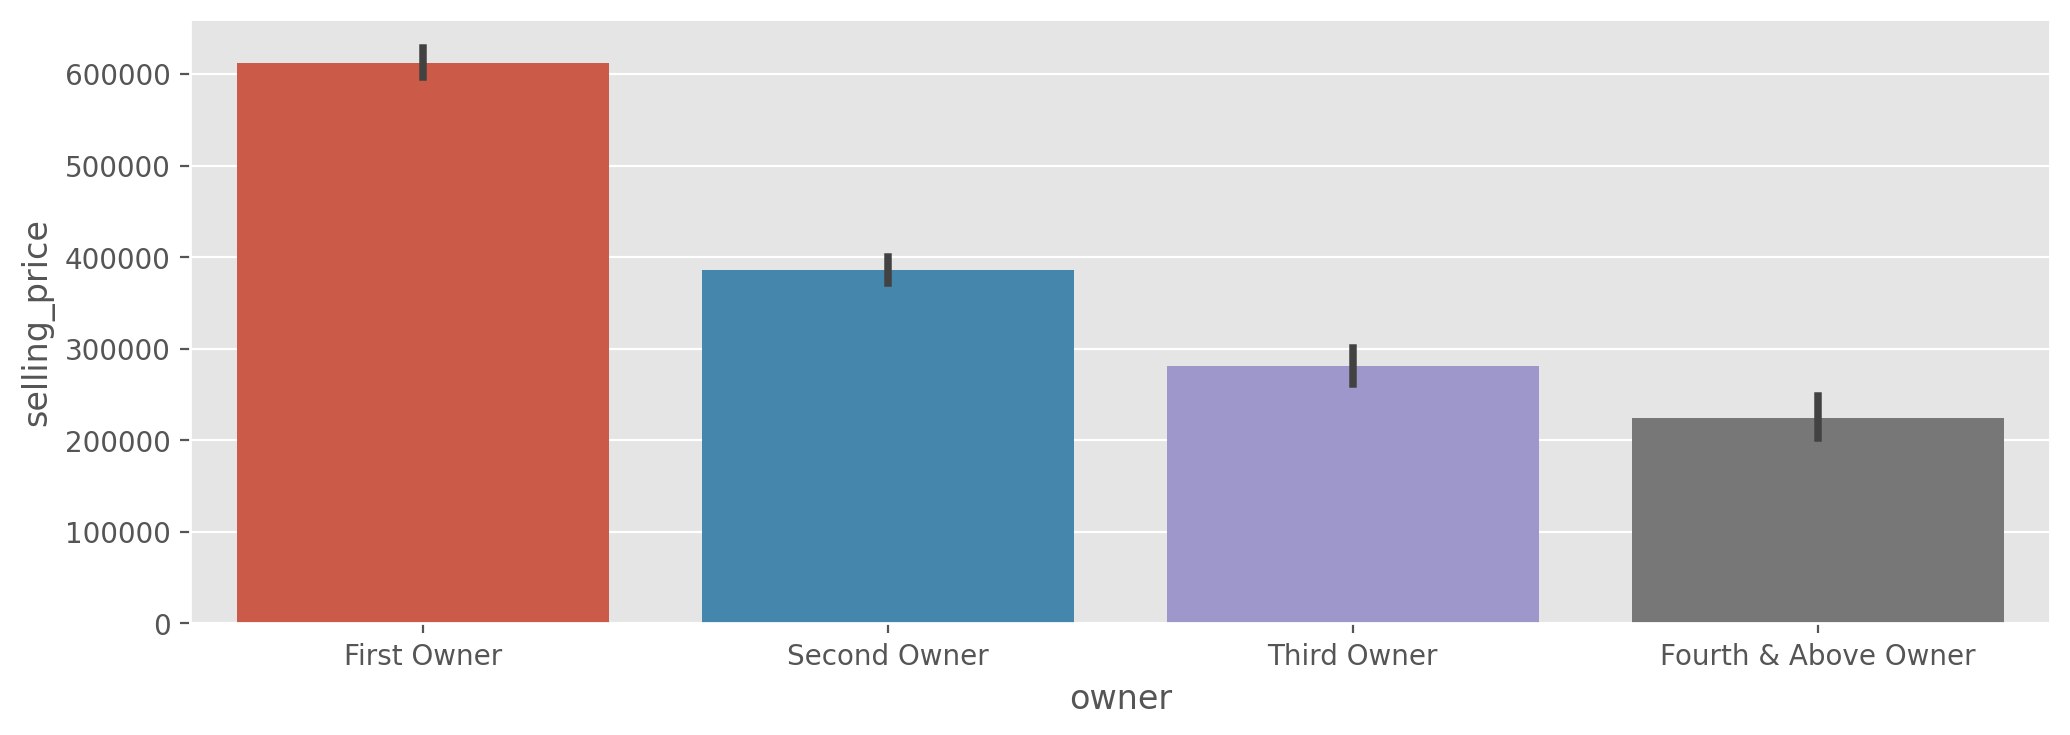

In [186]:
# selling price vs owner

plt.figure(figsize = (12,4), dpi = 200)

# we can drop the 'Test Drive car' data points. 
df = df[~(df['owner'] == 'Test Drive Car')]

sns.barplot('owner','selling_price', data = df)

# Conclusion : As the number of owners increases, the price decreases.

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

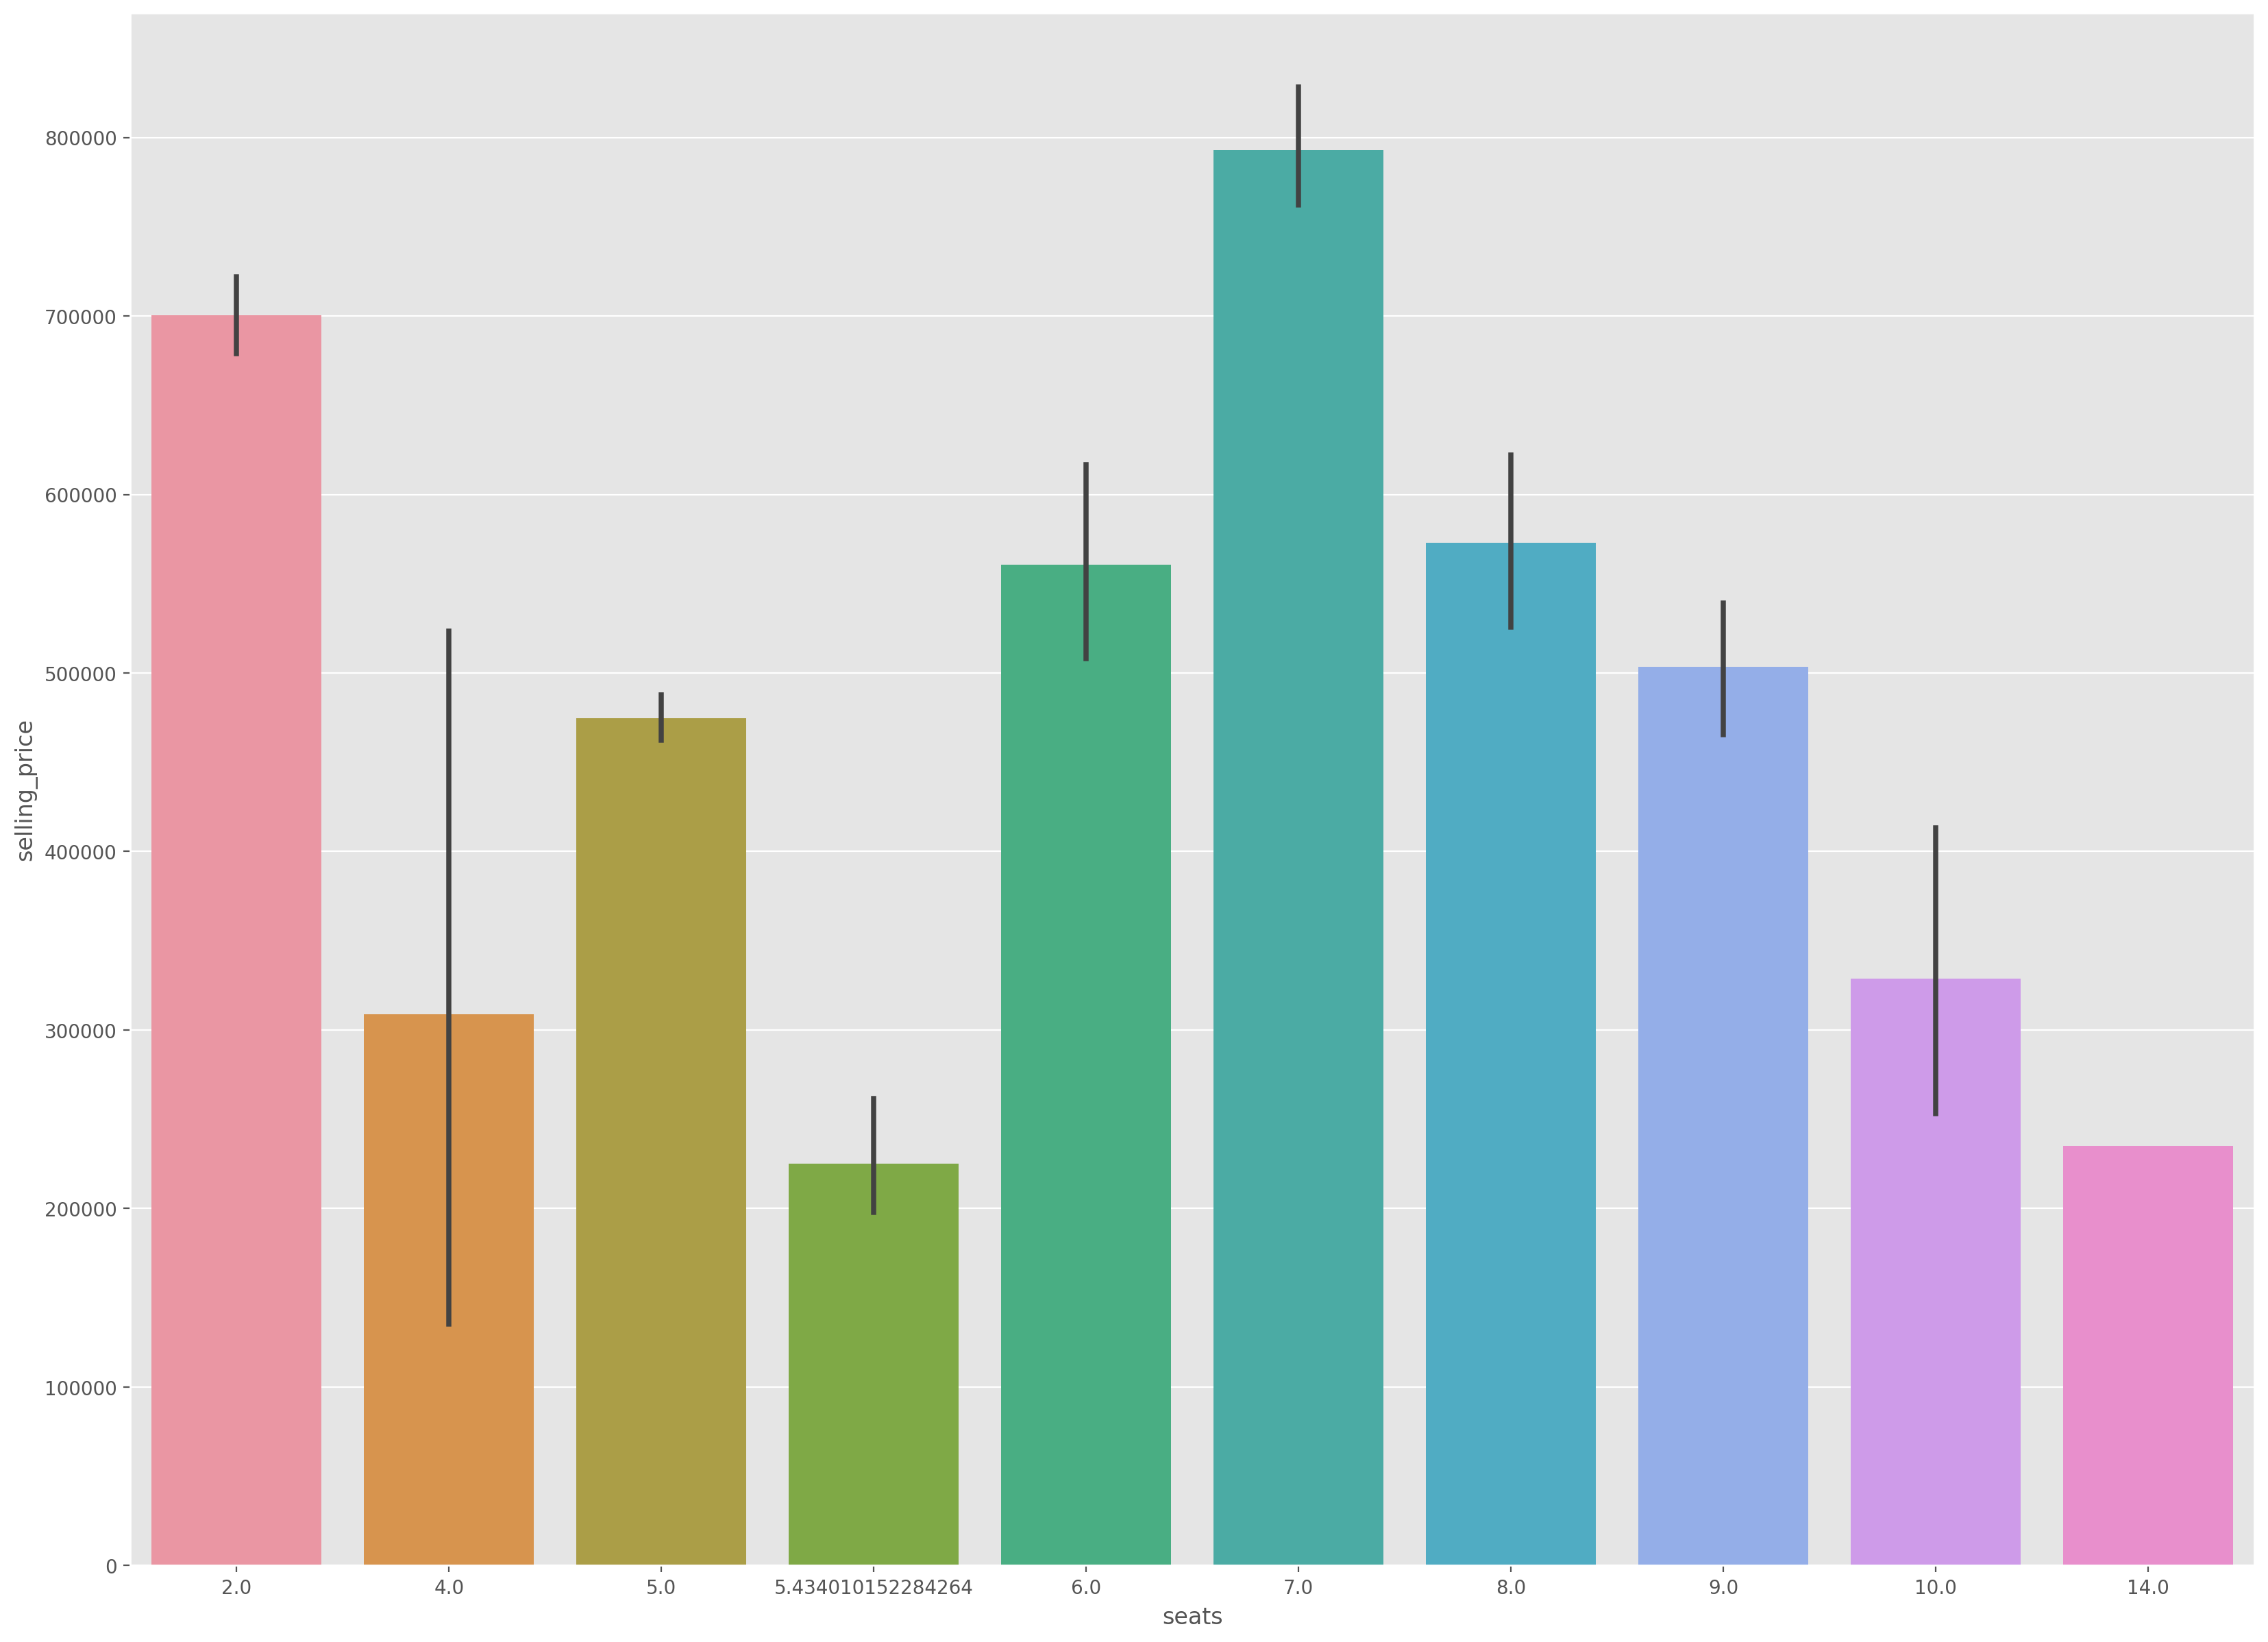

In [187]:
# selling price vs seats

plt.figure(figsize = (20,15), dpi = 200)

sns.barplot('seats','selling_price', data = df)

# Conclusion : Not sure about conclusion

<AxesSubplot:xlabel='year', ylabel='selling_price'>

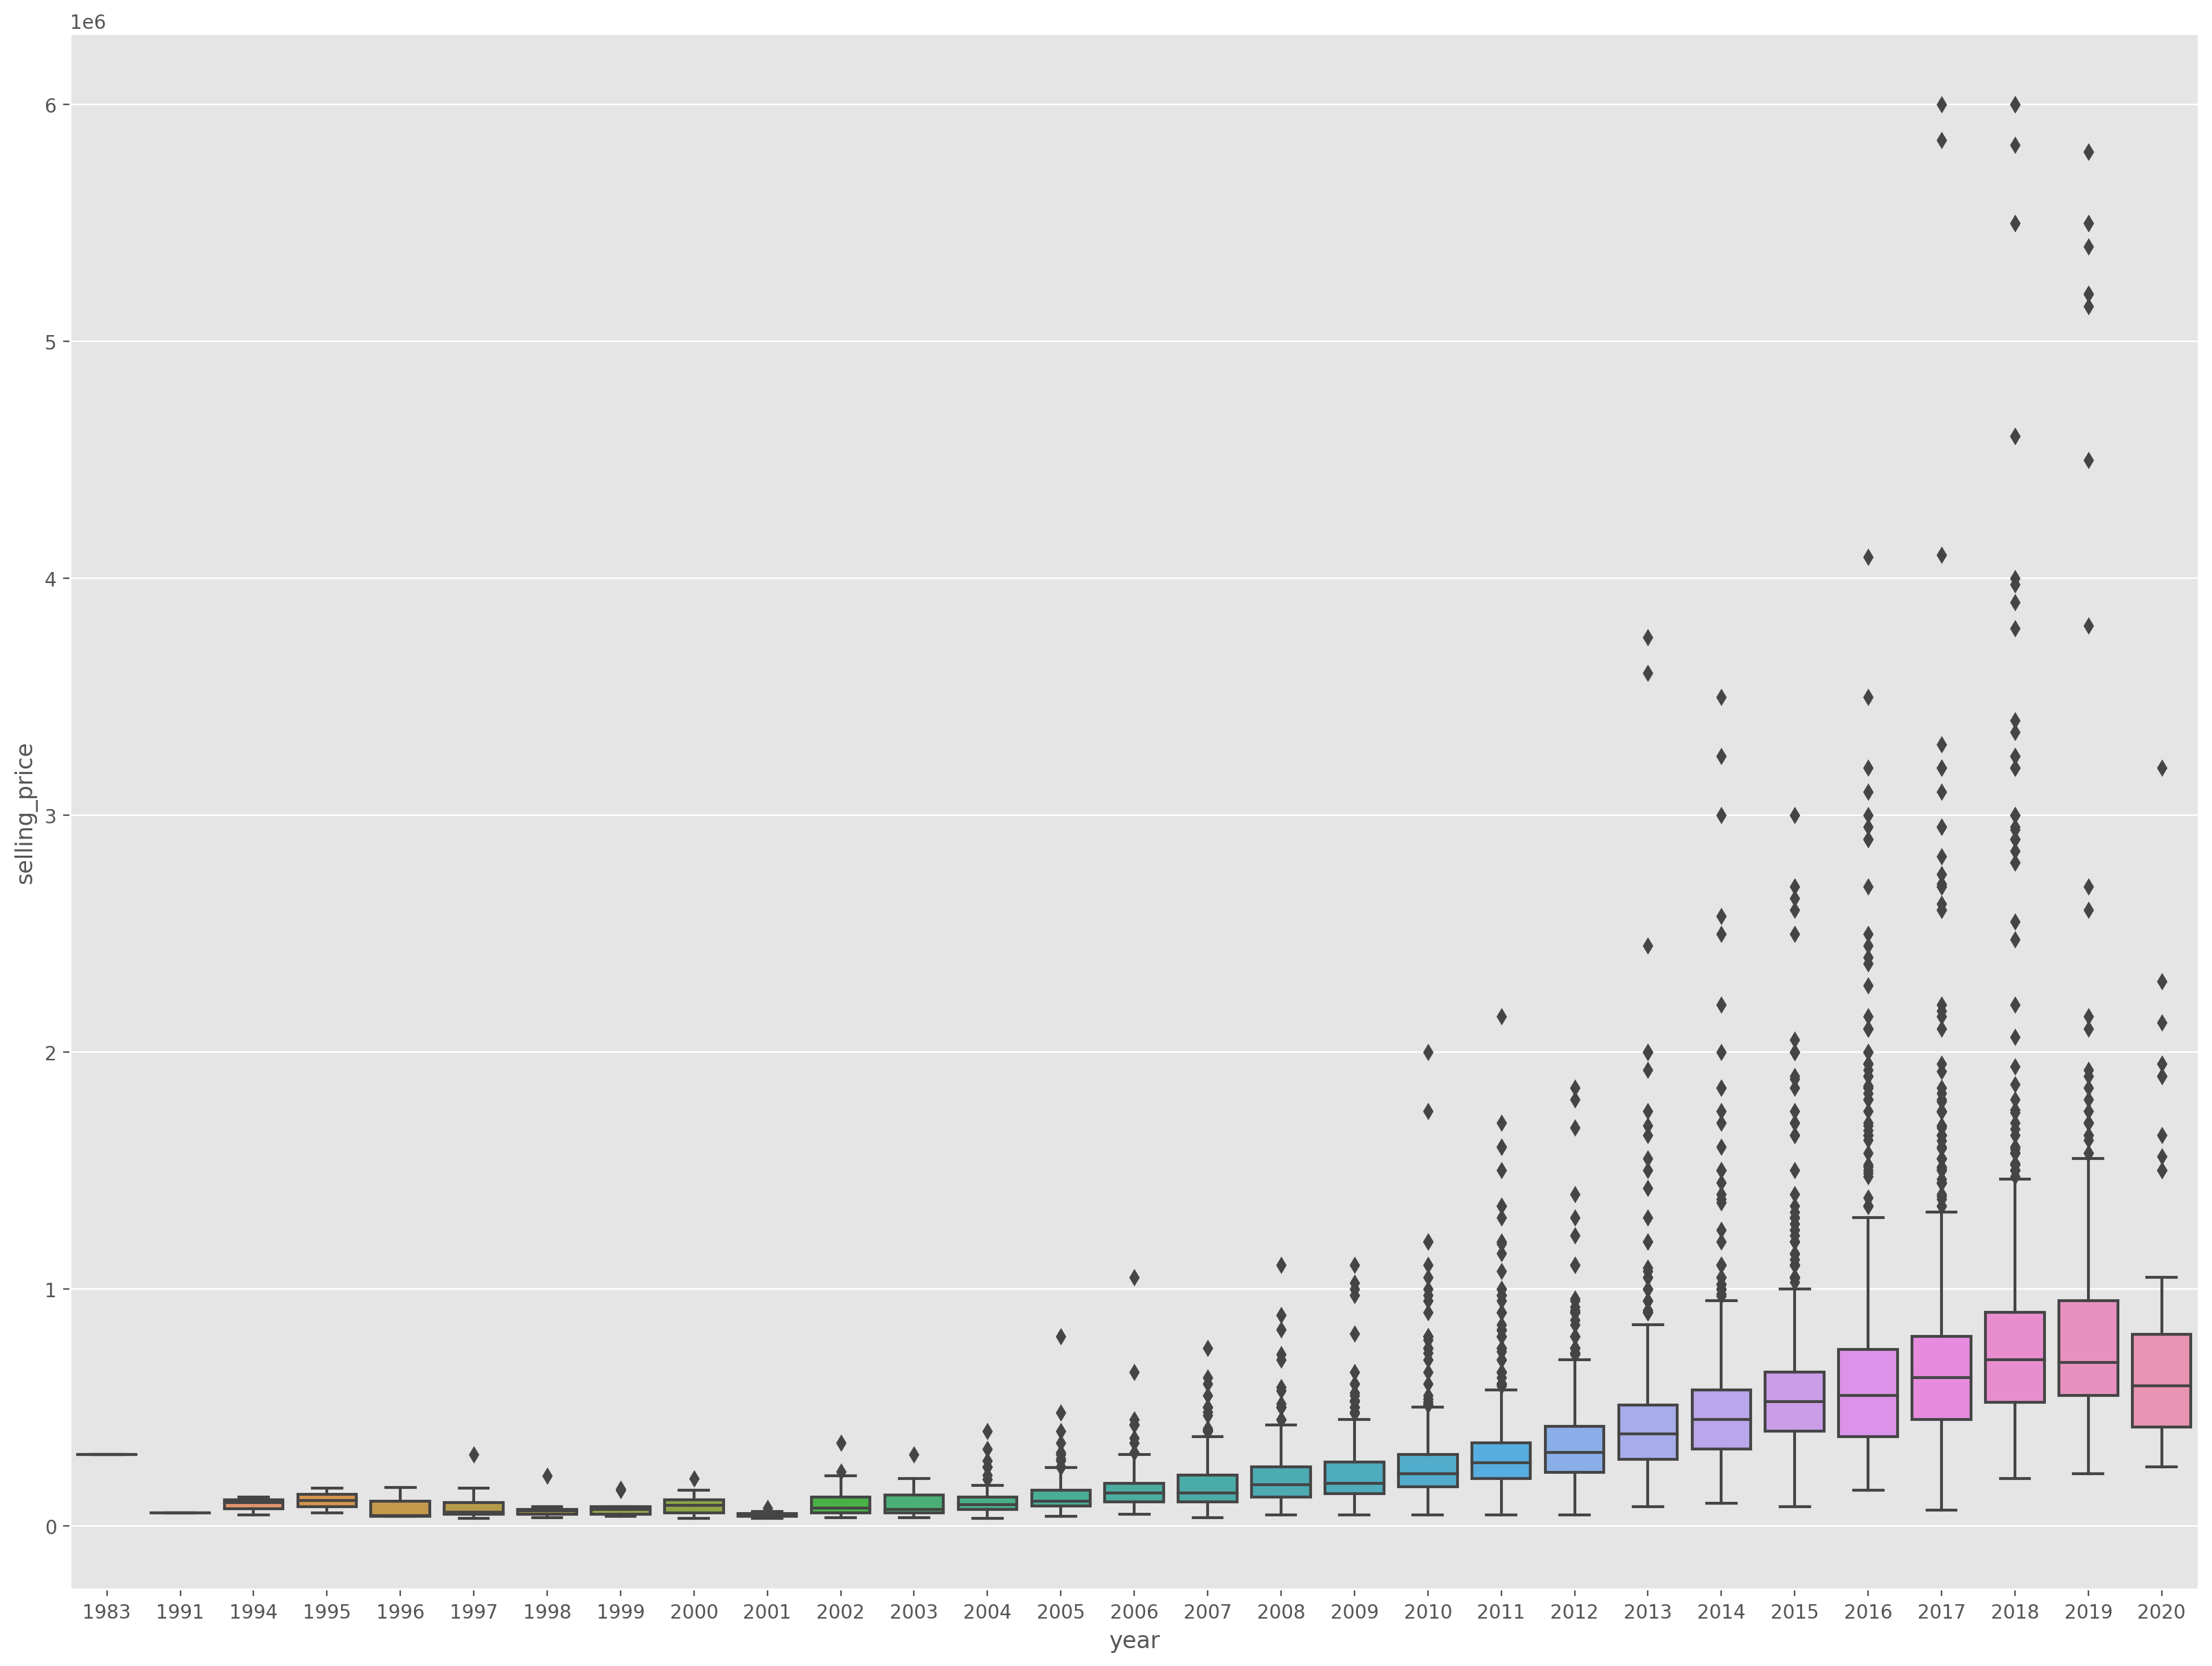

In [188]:
# selling price vs year

plt.figure(figsize = (20,15), dpi = 200)

sns.boxplot('year','selling_price', data = df)

# Conclusion : New cars as per the year also have high selling price except year 2020.(Covid 19 Pandemic)

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

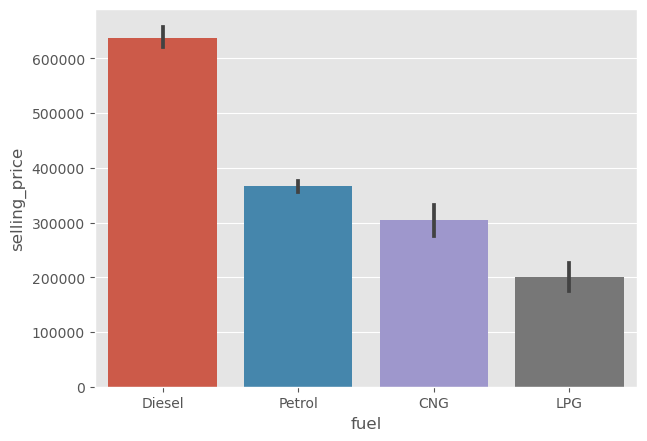

In [189]:
# selling price vs fuel

order = pd.DataFrame(df.groupby('fuel')['selling_price'].mean()).sort_values(ascending = False, by = 'selling_price')

index = order.index

plt.figure(figsize = (7,5), dpi = 100)

sns.barplot('fuel','selling_price', data = df, order = index)

# Conclusion : Diesel > Petrol > CNG > LPG (selling price comparison based on fuel type)

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

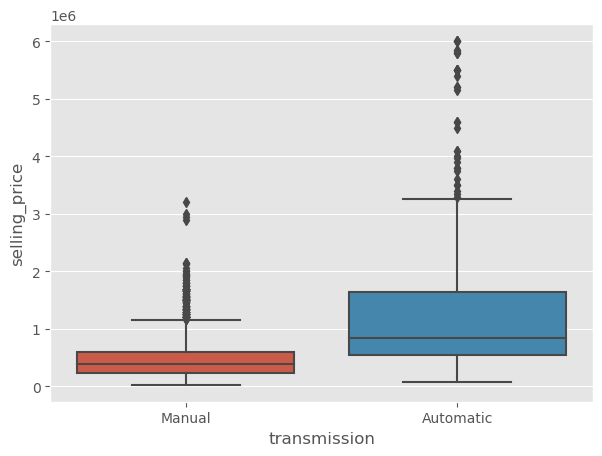

In [190]:
# selling price vs transmission

plt.figure(figsize = (7,5), dpi = 100)

sns.boxplot('transmission','selling_price', data = df)

# Conclusion : Automatic transmission cars have higher selling price than manual transmission.

<AxesSubplot:xlabel='engine', ylabel='selling_price'>

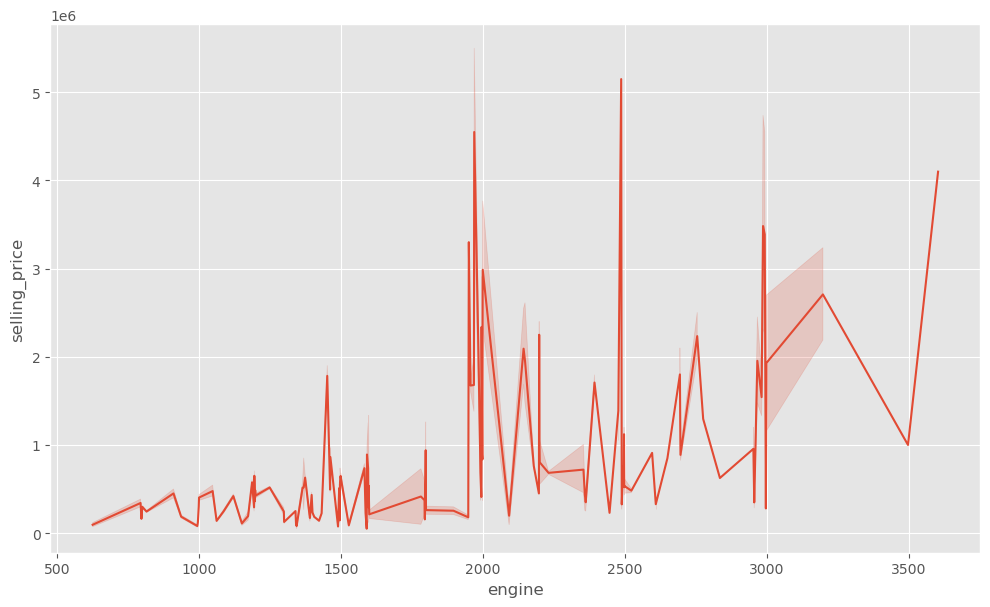

In [191]:
# selling price vs engine

plt.figure(figsize = (12,7), dpi = 100)

sns.lineplot('engine','selling_price', data = df)

# Conclusion : Not sure about conclusion

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

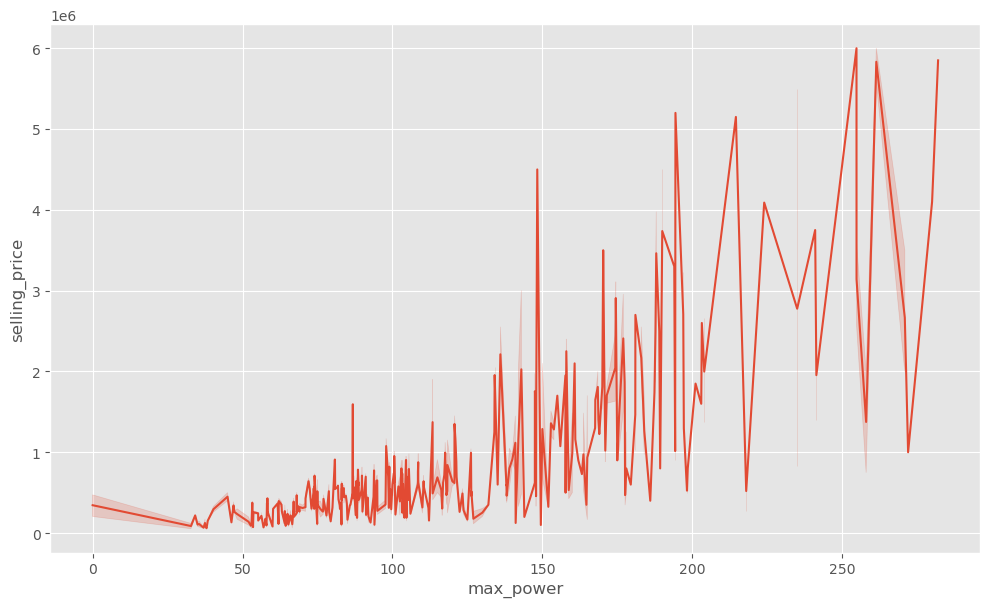

In [192]:
# selling price vs power

plt.figure(figsize = (12,7), dpi = 100)

sns.lineplot('max_power','selling_price', data = df)

# Conclusion : Direct proportion

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

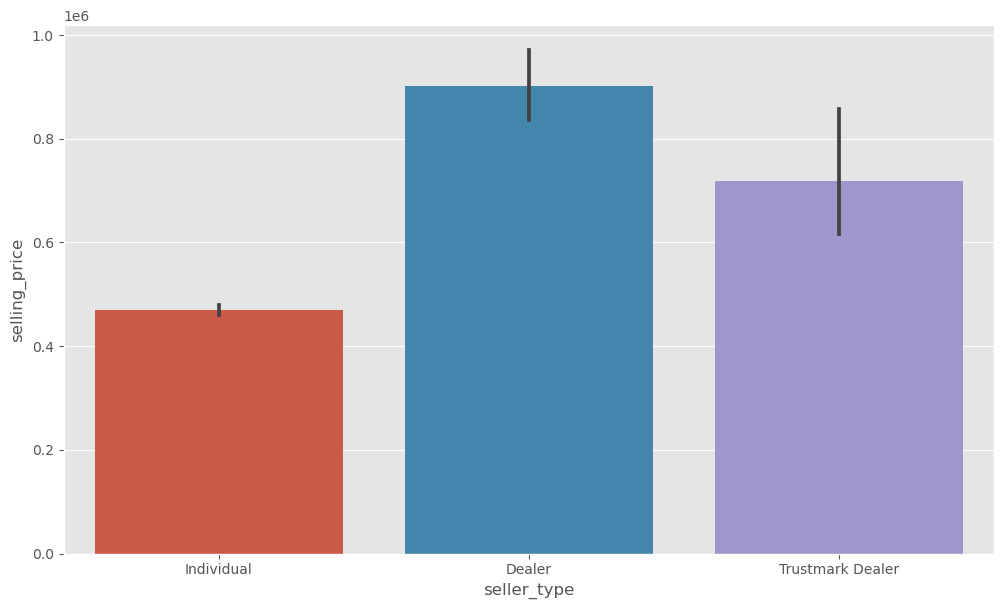

In [193]:
# selling price vs seller type

plt.figure(figsize = (12,7), dpi = 100)

sns.barplot('seller_type','selling_price', data = df)

# Conclusion : Dealer > Trustmark dealer > Individual

In [194]:
df.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.450329,-0.375604,0.346035,-0.019227,0.147996,0.024169
selling_price,0.450329,1.000000,-0.167271,-0.122608,0.456655,0.685532,0.171420
km_driven,-0.375604,-0.167271,1.000000,-0.194121,0.251190,0.045141,0.205060
mileage,0.346035,-0.122608,-0.194121,1.000000,-0.580438,-0.388440,-0.458766
engine,-0.019227,0.456655,0.251190,-0.580438,1.000000,0.685958,0.658891
max_power,0.147996,0.685532,0.045141,-0.388440,0.685958,1.000000,0.262889
seats,0.024169,0.171420,0.205060,-0.458766,0.658891,0.262889,1.000000


<AxesSubplot:>

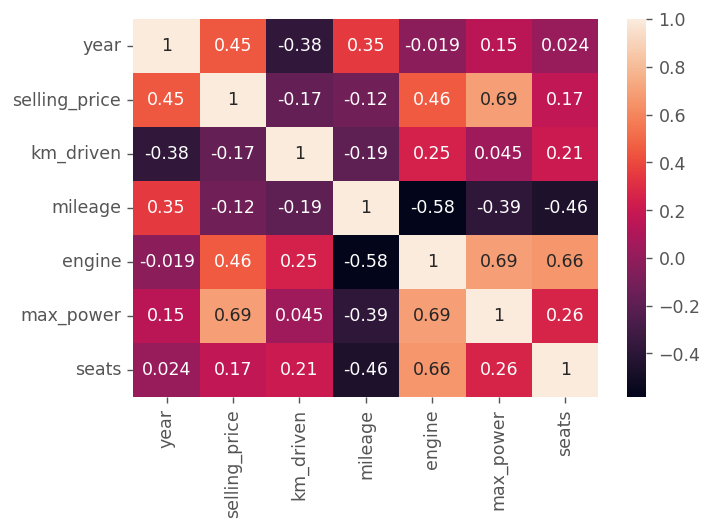

In [195]:
plt.figure(dpi = 125)

sns.heatmap(df.corr(), annot = True)

In [196]:
columns = ['owner', 'fuel', 'transmission', 'km_driven', 'year', 'seller_type', 'mileage', 'engine', 'max_power']

In [197]:
X = df[columns]

In [198]:
Y = df[['selling_price']]

In [199]:
X.head(10)

,owner,fuel,transmission,km_driven,year,seller_type,mileage,engine,max_power
0,First Owner,Diesel,Manual,145500,2014,Individual,23.40,1248.0,74.00
1,Second Owner,Diesel,Manual,120000,2014,Individual,21.14,1498.0,103.52
2,Third Owner,Petrol,Manual,140000,2006,Individual,17.70,1497.0,78.00
3,First Owner,Diesel,Manual,127000,2010,Individual,23.00,1396.0,90.00
4,First Owner,Petrol,Manual,120000,2007,Individual,16.10,1298.0,88.20
5,First Owner,Petrol,Manual,45000,2017,Individual,20.14,1197.0,81.86
6,First Owner,LPG,Manual,175000,2007,Individual,17.30,1061.0,57.50
7,Second Owner,Petrol,Manual,5000,2001,Individual,16.10,796.0,37.00
8,First Owner,Diesel,Manual,90000,2011,Individual,23.59,1364.0,67.10
9,First Owner,Diesel,Manual,169000,2013,Individual,20.00,1399.0,68.10


In [200]:
Y

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
...,...
8121,260000
8122,475000
8123,320000
8124,135000


In [201]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

categorical_columns = ['owner', 'fuel', 'transmission', 'seller_type']
X[categorical_columns] = encoder.fit_transform(X[categorical_columns])

X.head()

,owner,fuel,transmission,km_driven,year,seller_type,mileage,engine,max_power
0,0.0,1.0,1.0,145500,2014,1.0,23.40,1248.0,74.00
1,2.0,1.0,1.0,120000,2014,1.0,21.14,1498.0,103.52
2,3.0,3.0,1.0,140000,2006,1.0,17.70,1497.0,78.00
3,0.0,1.0,1.0,127000,2010,1.0,23.00,1396.0,90.00
4,0.0,3.0,1.0,120000,2007,1.0,16.10,1298.0,88.20


In [202]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [203]:
print('Training Data Shape   : ', x_train.shape)

print('Training labels Shape : ', y_train.shape)

print('Testing Data shape    : ', x_test.shape)

print('Testing labels shape  : ', y_test.shape)

Training Data Shape   :  (6209, 9)
Training labels Shape :  (6209, 1)
Testing Data shape    :  (690, 9)
Testing labels shape  :  (690, 1)


In [204]:
from sklearn.linear_model import LinearRegression                       # import the class

regressor = LinearRegression()                                          # create the object

regressor.fit(x_train, y_train)                                         # fit the object

LinearRegression()

In [205]:
regressor.intercept_

array([-68469942.31882839])

In [206]:
regressor.coef_

array([[-2.36929593e+04, -4.66147433e+04, -2.99071558e+05,
        -6.28858563e-01,  3.41679809e+04, -1.14634845e+05,
        -8.90913756e+02,  5.93557090e+01,  7.43055582e+03]])

In [207]:
print('Training set score :', regressor.score(x_train, y_train))

print('Testing set score :', regressor.score(x_test, y_test))

Training set score : 0.6417670586635609
Testing set score : 0.6248098254219203
